Given the changing political landscape in the U.S. currently and changes to curricula in higher education with regards to diversity, we wanted to ask the question: **How does racial homogeneity impact the presence and quality of gender studies programs?**

To begin, we obtained a CSV file with information about universities and colleges from the government website [National Center for Education Statistics (NCES).](https://nces.ed.gov/)

In [58]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df_colleges = pd.read_csv('/content/drive/My Drive/colleges.csv')
df_colleges = df_colleges.rename(columns={'Institution Name': 'Name', 'Total men': 'Men total', 'Total women': 'Women total'})

df_colleges.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,UnitID,Name,State,Affiliation,Urbanization,Total,Men total,Women total,American Indian or Alaska Native total,Asian total,Black or African American total,Hispanic total,Native Hawaiian or Other Pacific Islander total,White total,Two or more races total
0,177834,A T Still University of Health Sciences,MO,3.0,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,180203,Aaniiih Nakoda College,MT,1.0,43,133.0,59.0,74.0,121.0,0.0,0.0,0.0,0.0,12.0,0.0
2,222178,Abilene Christian University,TX,4.0,12,3188.0,1279.0,1909.0,16.0,62.0,214.0,570.0,0.0,2000.0,142.0
3,497037,Abilene Christian University-Undergraduate Online,TX,4.0,21,918.0,146.0,772.0,3.0,13.0,179.0,217.0,0.0,413.0,31.0
4,138558,Abraham Baldwin Agricultural College,GA,1.0,32,3768.0,1489.0,2279.0,12.0,49.0,312.0,374.0,2.0,2936.0,52.0


In [59]:
values_df = pd.read_csv('/content/drive/My Drive/valuelabels.csv')
values_df

,VariableName,Value,ValueLabel
0,Urbanization,11,City: Large
1,Urbanization,12,City: Midsize
2,Urbanization,13,City: Small
3,Urbanization,21,Suburb: Large
4,Urbanization,22,Suburb: Midsize
5,Urbanization,23,Suburb: Small
6,Urbanization,31,Town: Fringe
7,Urbanization,32,Town: Distant
8,Urbanization,33,Town: Remote
9,Urbanization,41,Rural: Fringe


The numerical values of the 'Urbanization' column represent the degree of urbanization for each college's location. We can see that a higher number indicates a more rural and less populated area, while a lower number signifies a more densely populated, urban region.

The numerical values of the 'Affiliation' column represents the type of college, and whether a school is private or public, for-profit or not-for-profit, and religous or not religious.

In [60]:
# Adding new columns representing the percentages of each gender + racial group for each college
group_cols = ['Men', 'Women', 'American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic', 'Native Hawaiian or Other Pacific Islander', 'White', 'Two or more races']

for col in group_cols:
  df_colleges[col + ' %'] = ((df_colleges[col + ' total'] / df_colleges['Total']) * 100).round(1)

df_colleges.head()

,UnitID,Name,State,Affiliation,Urbanization,Total,Men total,Women total,American Indian or Alaska Native total,Asian total,...,Two or more races total,Men %,Women %,American Indian or Alaska Native %,Asian %,Black or African American %,Hispanic %,Native Hawaiian or Other Pacific Islander %,White %,Two or more races %
0,177834,A T Still University of Health Sciences,MO,3.0,33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,180203,Aaniiih Nakoda College,MT,1.0,43,133.0,59.0,74.0,121.0,0.0,...,0.0,44.4,55.6,91.0,0.0,0.0,0.0,0.0,9.0,0.0
2,222178,Abilene Christian University,TX,4.0,12,3188.0,1279.0,1909.0,16.0,62.0,...,142.0,40.1,59.9,0.5,1.9,6.7,17.9,0.0,62.7,4.5
3,497037,Abilene Christian University-Undergraduate Online,TX,4.0,21,918.0,146.0,772.0,3.0,13.0,...,31.0,15.9,84.1,0.3,1.4,19.5,23.6,0.0,45.0,3.4
4,138558,Abraham Baldwin Agricultural College,GA,1.0,32,3768.0,1489.0,2279.0,12.0,49.0,...,52.0,39.5,60.5,0.3,1.3,8.3,9.9,0.1,77.9,1.4


How can we determine which schools are the most and least ***diverse***? We will analyze gender and racial demographic data to identify the 20 most and least diverse four-year colleges and universities in the United States.





We chose to use Simpson's Diversity Index to determine the diversity of each university, sorting the DataFrame from most to least diverse (based on their SDI metric).

In [61]:
import numpy as np

def calculate_simpsons(data):
  proportions = data / np.sum(data)
  sdi = 1 - np.sum(proportions**2)
  return sdi

df_colleges['SDI'] = df_colleges[['American Indian or Alaska Native %', 'Asian %', 'Black or African American %',
                                  'Hispanic %', 'Native Hawaiian or Other Pacific Islander %', 'White %',
                                  'Two or more races %']].apply(calculate_simpsons, axis=1)

df_colleges.dropna(inplace=True)

df_diverse = df_colleges[(df_colleges['Total'] >= 1000) & (abs(df_colleges['Women %'] - df_colleges['Men %']) <= 15)]

df_diverse = df_diverse.sort_values(by='SDI', ascending=False)
df_diverse.head()

,UnitID,Name,State,Affiliation,Urbanization,Total,Men total,Women total,American Indian or Alaska Native total,Asian total,...,Men %,Women %,American Indian or Alaska Native %,Asian %,Black or African American %,Hispanic %,Native Hawaiian or Other Pacific Islander %,White %,Two or more races %,SDI
955,170286,Hillsdale College,MI,4.0,32,1688.0,838.0,850.0,0.0,0.0,...,49.6,50.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
1854,236513,Seattle Central College,WA,1.0,11,5210.0,2242.0,2968.0,12.0,913.0,...,43.0,57.0,0.2,17.5,15.5,12.3,0.3,24.2,7.3,0.776270
91,168740,Andrews University,MI,4.0,31,1312.0,637.0,675.0,2.0,158.0,...,48.6,51.4,0.2,12.0,16.9,20.4,0.6,22.0,5.6,0.774480
1661,121345,Pomona College,CA,3.0,21,1664.0,752.0,912.0,0.0,298.0,...,45.2,54.8,0.0,17.9,10.6,16.3,0.5,29.1,9.4,0.767334
1998,243744,Stanford University,CA,3.0,21,8054.0,3900.0,4154.0,63.0,2175.0,...,48.4,51.6,0.8,27.0,8.1,18.5,0.2,23.8,9.3,0.767208


# Exploring the Dataset

<Axes: title={'center': 'Urbanization vs. SDI'}, xlabel='Urbanization', ylabel='Average SDI'>

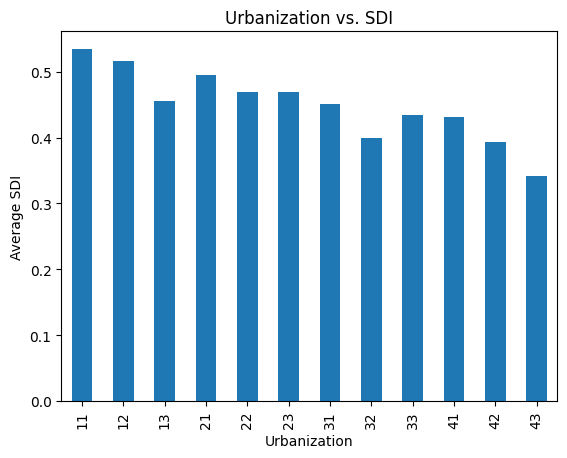

In [74]:
avg_sdi_by_urb = df_colleges.groupby('Urbanization')['SDI'].mean()
avg_sdi_by_urb.plot.bar(title='Urbanization vs. SDI', ylabel='Average SDI')

Earlier, we've seen that higher values in the 'Urbanization' column signifies a more rural, less populated area. The bar plot above visualizes the relationship between the Urbanization levels and the SDI values of all four-year colleges in the US. By calculating the average SDI for each urbanization category, we can observe that colleges located in more 'urban' or city-like environments tend to have a more racially diverse student population.

In [65]:
df_colleges['Is Public'] = (df_colleges['Affiliation'] == 1)
df_colleges['Is Religious'] = (df_colleges['Affiliation'] == 4)

<Axes: title={'center': 'Is Public vs. SDI'}, xlabel='Is Public', ylabel='Average SDI'>

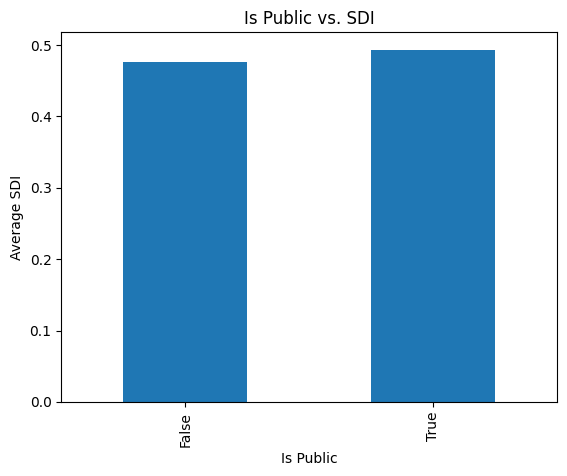

In [75]:
avg_sdi_by_public = df_colleges.groupby('Is Public')['SDI'].mean()
avg_sdi_by_public.plot.bar(title='Is Public vs. SDI', ylabel='Average SDI')

<Axes: title={'center': 'Is Religious vs. SDI'}, xlabel='Is Religious', ylabel='Average SDI'>

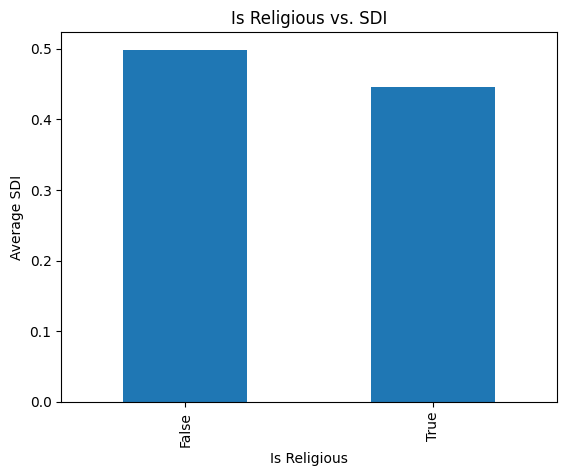

In [76]:
avg_sdi_by_religious = df_colleges.groupby('Is Religious')['SDI'].mean()
avg_sdi_by_religious.plot.bar(title='Is Religious vs. SDI', ylabel='Average SDI')

The above plots visualize the relationship between the type of college (based on whether it is public or private and religious or not religious) and their SDI values. The plot titled 'Is Public vs. SDI' indicates a higher average SDI among schools that are public, while the 'Is Religious vs. SDI' plot indicates that schools that are not religious have higher SDI values on average.

So we can observe that public, non-religious colleges that are located in more urban areas are more likely to have greater racial diversity among their students.


Focusing on our research question, we filtered our search to four-year universities and colleges, excluding institutions that offer two-year degrees with limited four-year programs such as Seattle Central College and Laredo College.

In [9]:
# Dropping Hillsdale College because the number of students among all racial groups is 0
# Dropping Solano Community College and Seattle Central College because they have been mistakenly counted as a four-year university
df_most_diverse = df_diverse[~df_diverse['Name'].isin(['Hillsdale College', 'Solano Community College', 'Seattle Central College'])]

df_most_diverse = df_most_diverse.head(20)
df_most_diverse.head()

,UnitID,Name,State,Affiliation,Urbanization,Total,Men total,Women total,American Indian or Alaska Native total,Asian total,...,Men %,Women %,American Indian or Alaska Native %,Asian %,Black or African American %,Hispanic %,Native Hawaiian or Other Pacific Islander %,White %,Two or more races %,SDI
91,168740,Andrews University,MI,Private not-for-profit (religious affiliation),31,1312.0,637.0,675.0,2.0,158.0,...,48.6,51.4,0.2,12.0,16.9,20.4,0.6,22.0,5.6,0.774480
1661,121345,Pomona College,CA,Private not-for-profit (no religious affiliation),21,1664.0,752.0,912.0,0.0,298.0,...,45.2,54.8,0.0,17.9,10.6,16.3,0.5,29.1,9.4,0.767334
1998,243744,Stanford University,CA,Private not-for-profit (no religious affiliation),21,8054.0,3900.0,4154.0,63.0,2175.0,...,48.4,51.6,0.8,27.0,8.1,18.5,0.2,23.8,9.3,0.767208
2060,216287,Swarthmore College,PA,Private not-for-profit (no religious affiliation),21,1644.0,795.0,849.0,7.0,288.0,...,48.4,51.6,0.4,17.5,9.4,15.1,0.1,29.6,11.0,0.765415
589,190549,CUNY Brooklyn College,NY,Public,11,11330.0,5000.0,6330.0,11.0,2671.0,...,44.1,55.9,0.1,23.6,22.8,22.7,0.0,24.7,3.2,0.765344


Based on heuristics, we kept the gender equality factor constant for the least diverse colleges because we wanted to focus specifically on how *racial* diversity affects Gender Studies curricula.

If we had not introduced this constraint, our dataset would incorporate universities with significant gender imbalances (e.g. women's colleges), and our data analysis would not account for these differences.

For the purposes of this project, we excluded colleges that were not easily web-scrapable via web scraping tools such as Beautiful Soup or Selenium. For example, there were some dynamic webpages that would not load elements after 120 seconds, despite using Selenium to scrape them.

In [14]:
# Dropping Laredo College and South Texas College because they have been mistakenly counted as a four-year university
df_least_diverse = df_diverse[~df_diverse['Name'].isin(['Laredo College', 'South Texas College', 'The Southern Baptist Theological Seminary'])].sort_values(by='SDI', ascending=True)
df_least_diverse = df_least_diverse.head(20)
df_least_diverse.head()

,UnitID,Name,State,Affiliation,Urbanization,Total,Men total,Women total,American Indian or Alaska Native total,Asian total,...,Men %,Women %,American Indian or Alaska Native %,Asian %,Black or African American %,Hispanic %,Native Hawaiian or Other Pacific Islander %,White %,Two or more races %,SDI
1055,198756,Johnson C Smith University,NC,Private not-for-profit (no religious affiliation),11,1058.0,519.0,539.0,6.0,2.0,...,49.1,50.9,0.6,0.2,77.1,0.4,0.1,0.6,0.2,0.052173
1315,101675,Miles College,AL,Private not-for-profit (religious affiliation),21,1151.0,542.0,609.0,0.0,1.0,...,47.1,52.9,0.0,0.1,95.1,1.8,0.0,2.5,0.3,0.091008
1901,218733,South Carolina State University,SC,Public,32,2762.0,1209.0,1553.0,5.0,5.0,...,43.8,56.2,0.2,0.2,92.7,0.1,0.1,1.4,2.6,0.091386
2711,197708,Yeshiva University,NY,Private not-for-profit (no religious affiliation),11,3091.0,1709.0,1382.0,1.0,3.0,...,55.3,44.7,0.0,0.1,0.2,2.2,0.0,60.0,0.7,0.097355
223,217721,Benedict College,SC,Private not-for-profit (religious affiliation),12,1694.0,798.0,896.0,18.0,9.0,...,47.1,52.9,1.1,0.5,74.7,2.8,0.1,0.8,0.0,0.126556
